<a href="https://colab.research.google.com/github/MUmairAB/Twitter-Sentiment-Analysis/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

Our data is not in clean form. It needs some data cleaning.

Then it needs to be manipulated for natural language processing.

In [186]:
# Loading csv file containing tweets data
tweets = pd.read_csv('/content/sample_data/tweets_data2.csv')#'/tweets_data2.csv')
tweets.shape

(30010, 7)

In [187]:
print(f'Data has:\n\t{tweets.shape[0]} rows\n\t{tweets.shape[1]} columns')

Data has:
	30010 rows
	7 columns


# Data Cleaning

In [114]:
tweets.reset_index(drop=True,inplace=True)
# Looking at the data
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,2023-02-27 15:01:00+00:00,1630221468477816838,"ICYMI: In Pennsylvania, a school district canc...",PENamerica,0,0,en
1,2023-02-27 15:00:57+00:00,1630221455450427394,If action is not taken now to tackle #climate ...,circleofblue,0,0,en
2,2023-02-27 15:00:56+00:00,1630221451646357504,Let's Collaborate\nhttps://t.co/CcJJvbeL2Z \n#...,WriteCanvas,0,0,en
3,2023-02-27 15:00:51+00:00,1630221428661407744,"As climate change affects ecosystems, one spec...",TheDailyClimate,0,0,en
4,2023-02-27 15:00:47+00:00,1630221411980656640,"Mar 2 @ 11am ET, join us for a virtual science...",caryinstitute,0,0,en


In [115]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Datetime          30010 non-null  object
 1   Tweeter Id        30010 non-null  int64 
 2   Content           30010 non-null  object
 3   Twitter Username  30010 non-null  object
 4   Likes             30010 non-null  int64 
 5   No of Retweets    30010 non-null  int64 
 6   Tweet Language    30010 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [116]:
# Selecting "english" tweets
tweets = tweets[tweets['Tweet Language'] == 'en']

In [117]:
# Check for NULL values
tweets.isnull().sum()

Datetime            0
Tweeter Id          0
Content             0
Twitter Username    0
Likes               0
No of Retweets      0
Tweet Language      0
dtype: int64

In [188]:
# Copy of the original DataFrame for future usage
tweets_copy = tweets.copy()

In [189]:
# Check for duplicate tweets
print('Number of duplicate tweets INCLUDING the retweets: ',end='')
print(tweets['Content'].duplicated().sum())
# The above statement will give the number of duplicate tweets INCLUDING the retweets.

print('Number of duplicate tweets EXCLUDING the retweets: ',end='')
print(tweets.duplicated().sum())
# The above statement will give the number of duplicate tweets EXCLUDING the retweets.

Number of duplicate tweets INCLUDING the retweets: 26754
Number of duplicate tweets EXCLUDING the retweets: 26189


**For a better understanding of sentiments about the climate change, we will keep the retweets. So that we can know that whether people are retweeting the pro-climate tweets or anti-climate tweets.**

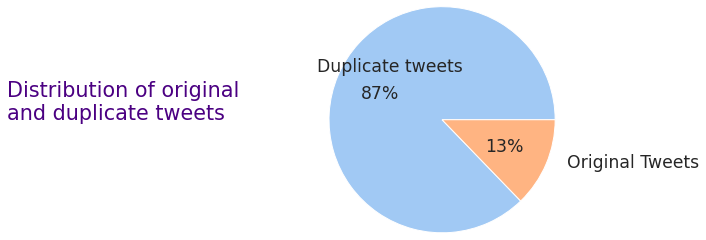

In [120]:
# Let's plot a pie plot to see the duplicate and original tweets distribution 
# length of duplicate tweets
n_dup = tweets.duplicated().sum()

# length of original tweets
n_org = tweets.shape[0] - tweets.duplicated().sum()

c=sns.color_palette('pastel')[0:2]
plt.pie(x=[n_dup,n_org],
        labels = ['Duplicate tweets','Original Tweets\n'],colors=c,radius=1.3,
        center=(6,0), autopct='%.0f%%',
        textprops ={"size":"x-large"},labeldistance=1.2);

plt.text(1,0,s="Distribution of original\nand duplicate tweets",
        color="indigo",size="xx-large");
plt.savefig('pie chart.png',bbox_inches='tight')

The amount of duplicate tweets shows usage of spam accounts and chat bots to shape the narrative, and amplify a trend on Twitter.

## **In near future, I will try to investigate whether these chat bots are used to shape the pro climate change narrative or anti climate change narrative.**

In [190]:
# Let's look at a few duplicate tweets
tweets = tweets.drop_duplicates().reset_index(drop=True)
print(tweets.shape)
tweets.head()

(3821, 7)


,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,2023-02-27 15:01:00+00:00,1630221468477816838,"ICYMI: In Pennsylvania, a school district canc...",PENamerica,0,0,en
1,2023-02-27 15:00:57+00:00,1630221455450427394,If action is not taken now to tackle #climate ...,circleofblue,0,0,en
2,2023-02-27 15:00:56+00:00,1630221451646357504,Let's Collaborate\nhttps://t.co/CcJJvbeL2Z \n#...,WriteCanvas,0,0,en
3,2023-02-27 15:00:51+00:00,1630221428661407744,"As climate change affects ecosystems, one spec...",TheDailyClimate,0,0,en
4,2023-02-27 15:00:47+00:00,1630221411980656640,"Mar 2 @ 11am ET, join us for a virtual science...",caryinstitute,0,0,en


# NLP
Since we have done the initial data cleaning, we can move on to further processing of the data.

This processing involves:
*   Removal of all links and special characters from the tweets
*   Tokenization and removal of stopwords
*   Lemmatization of the words of tweets

To do this, we'll use **Natural Language Toolkit (NLTK)**. It is a very popular suite of libraries and programs used for statistical natural language processing for English language.


In [191]:
# Importing NLTK and other standard libraries
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [192]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
#stopword=set(stopwords.words('english'))
stopword=stopwords.words('english')
# Stop words don't carry much useful information in them.
# Thus, they will be removed from the tweets for further analysis 
sw_extend = ('climate', 'change','global','climatechange','climate change' ,'warming','climate action','environment',
             'environmental change','weather','earth','nature','extreme','wildfire')
stopword.extend(sw_extend)
def tweet_cleaner(twt):
    # lowercase the tweet words
    twt = str(twt).lower()

    # Removing punctuation and external links
    twt = re.sub('\[.*?\]', '', twt)
    twt = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", twt)
    twt = re.sub('https?://\S+|www\.\S+', '', twt)
    twt = re.sub('<.*?>+', '', twt)
    twt = re.sub('[%s]' % re.escape(string.punctuation), '', twt)
    twt = re.sub('\n', '', twt)
    twt = re.sub('\w*\d\w*', '', twt)
    twt = re.sub(r"\s{2,}", " ", twt)
    twt = re.sub(r"'", " ", twt)
    twt = re.sub(r":", " : ", twt)
    twt = re.sub(r"#", " ", twt)

    # Removing stop words
    twt = [word for word in twt.split(' ') if word not in stopword]
    twt=" ".join(twt)

    # Lemmatization of the words
    twt = [lemmatizer.lemmatize(word) for word in twt.split(' ')]
    twt=" ".join(twt)
    return twt
tweets["Content"] = tweets["Content"].apply(tweet_cleaner)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,2023-02-27 15:01:00+00:00,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en
1,2023-02-27 15:00:57+00:00,1630221455450427394,action taken tackle european commission chief ...,circleofblue,0,0,en
2,2023-02-27 15:00:56+00:00,1630221451646357504,let collaborate http carbonneutral carbonneutr...,WriteCanvas,0,0,en
3,2023-02-27 15:00:51+00:00,1630221428661407744,affect ecosystem one specie may benefit effect...,TheDailyClimate,0,0,en
4,2023-02-27 15:00:47+00:00,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en


# Word Cloud
It is nice to plot a word cloud to get the glimpse of the frequently used used in tweets.

For that, we'll use **wordcloud** library.

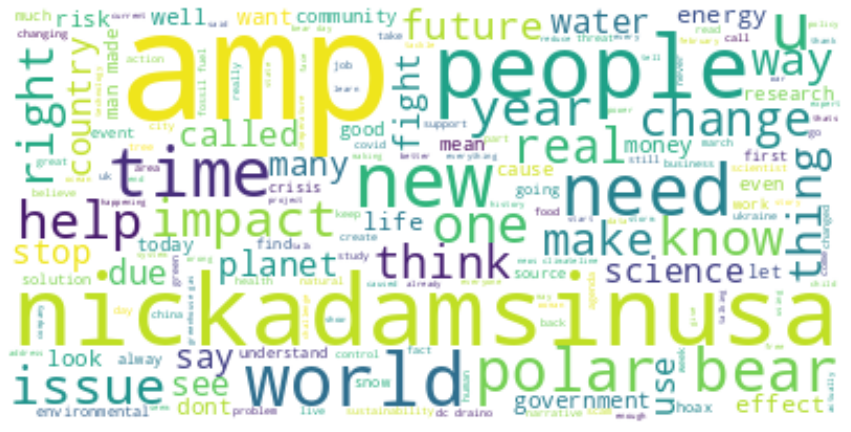

In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = " ".join(i for i in tweets['Content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word cloud.png')

# Text Vectorization
Finally, we'll do the text vectorization. This is done to transform all the text tokens into numerical vectors.

To perform this operation, there are two ways:
* **CountVectorizer()** — the raw word counts often lead to features that put too much weight on words that appear very frequently. This might cause anomalies.
* **TF–IDF vectorizer()** — term frequency–inverse document frequency (TF–IDF), weights the word counts by a measure of how often they appear in the documents.

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

If we use the default values of **TfidfVectorizer()** utility, our sparse matrix (output) will consider all words, even back slang or misspells. In order to avoid it, we'll fine tune it. 

We will not include words that occur over 80% times in our document corpus. 
We will also ignore the words that occur fewer than twice in our document corpus.

In [36]:
vec = TfidfVectorizer(max_df=0.80, min_df=2,smooth_idf=True)
X = vec.fit_transform(tweets['Content'])

In [37]:
X

<3672x5093 sparse matrix of type '<class 'numpy.float64'>'
	with 48682 stored elements in Compressed Sparse Row format>

In [38]:
# X is a sparse matrix. we can convert it to a DataFrame as follows
X_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
X_df

,aadimahotsav,aae,aajtak,abc,abdulla,ability,able,abnormal,abortion,absolute,...,zealot,zee,zero,zerowaste,zim,zone,zonnepanelen,zoo,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_df.shape

(3672, 5093)

# Sentiment Analysis
For sentiment analysis of unlabelled data, we need to use a pre-trained model. There are two popular options:
* **Textblob**
* **Vader**

For social media related sentiment analysis where text contains slang words, empjis and a lot of new Gen Z slang terms, Vader is highly recomended.

In [126]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [100]:
i=0
for splt in tweets['Content'][i].split():
  print(splt)

icymi
pennsylvania
school
district
cancelled
middle
school
reading
ya
best
seller
two
degree
centered
topic


In [194]:

analyzer = SentimentIntensityAnalyzer()
#sentiments.lexicon.update(new_words)
scores=list()
sentiment=list()
tweets['Sentiment'] = '' # Creating a sentiment column in DataFrame

Positive_words = list()
Neutral_words = list()
Negative_words = list()

for i in range(tweets.shape[0]):
    score = analyzer.polarity_scores(tweets['Content'][i])['compound']
    scores.append(score)

    if score>=0.75:
        tweets['Sentiment'][i] = 'Overly Positive'
    elif (score>=0.05) and (score<0.75):
        tweets['Sentiment'][i] = 'Positive'
    elif score<=-0.75:
        tweets['Sentiment'][i] = 'Overly Negative'
    elif (score<=-0.05) and (score>-0.75):
        tweets['Sentiment'][i] = 'Negative'
    else:
        tweets['Sentiment'][i] = 'Neutral'
    
    # Word Cloud
    for word in tweets['Content'][i].split():
        word_score = analyzer.polarity_scores(word)['compound']

        if (word_score>=0.05) and (word_score<0.75):
            Positive_words.append(word)
        elif (word_score<=-0.05) and (word_score>-0.75):
            Negative_words.append(word)
        else:
            Neutral_words.append(word)

In [133]:
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language,Sentiment
0,2023-02-27 15:01:00+00:00,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en,Positive
1,2023-02-27 15:00:57+00:00,1630221455450427394,action taken tackle european commission chief ...,circleofblue,0,0,en,Overly Negative
2,2023-02-27 15:00:56+00:00,1630221451646357504,let collaborate http carbonneutral carbonneutr...,WriteCanvas,0,0,en,Positive
3,2023-02-27 15:00:51+00:00,1630221428661407744,affect ecosystem one specie may benefit effect...,TheDailyClimate,0,0,en,Positive
4,2023-02-27 15:00:47+00:00,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en,Overly Positive


In [134]:
pd.Series(Neutral_words).value_counts()

http               1864
amp                 433
nickadamsinusa      390
u                   304
world               246
                   ... 
sofa                  1
nsdcouncil            1
advertisergroup       1
mall                  1
wholeheartedly        1
Length: 9871, dtype: int64

In [136]:
print('Number of positive words:',len(Positive_words))
print('Number of neutral words:',len(Neutral_words))
print('Number of negative words',len(Negative_words))

Number of positive words: 4321
Number of neutral words: 49354
Number of negative words 3532


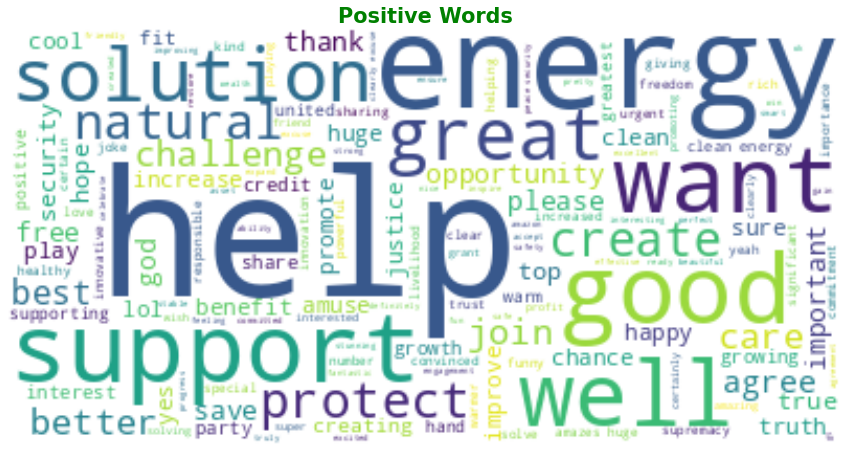

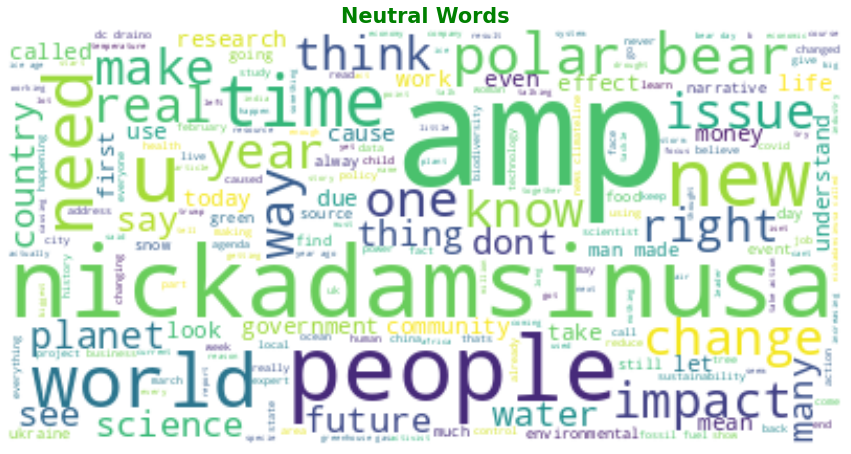

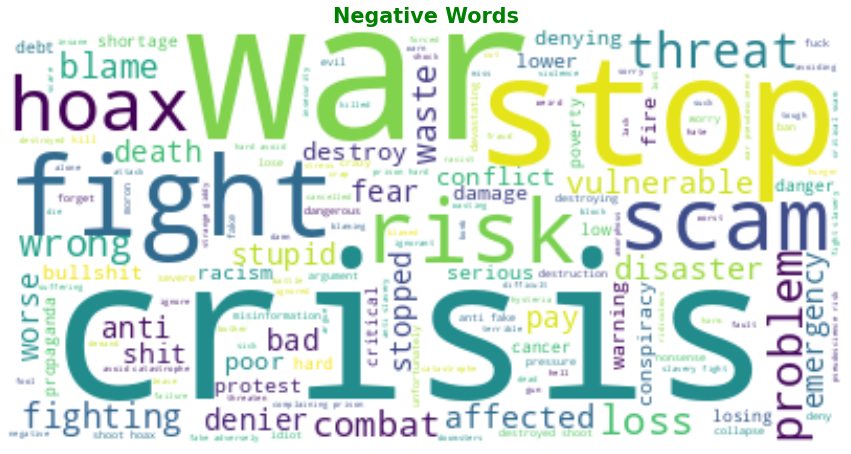

In [139]:
# Word clouds
for w_list, cloud_title in zip([Positive_words,Neutral_words,Negative_words],
               ['Positive Words','Neutral Words','Negative Words']):
       if w_list:
          text = " ".join(i for i in w_list)
          stopwords = set(STOPWORDS)
          wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
          plt.figure(figsize=(15,8))
          plt.imshow(wordcloud, interpolation='bilinear')
          plt.axis("off")
          plt.title(label=cloud_title,size='xx-large',
                    fontdict={'fontsize': 'xx-large',
                              'fontweight': 'bold',
                              'color': 'green'})
          plt.savefig(f'{cloud_title}.png')

In [62]:
tweets['Sentiment'].value_counts()

Positive           1233
Negative           1090
Neutral             828
Overly Positive     291
Overly Negative     230
Name: Sentiment, dtype: int64

# Sentiment plots

**Average likes and retweets on different sentiments**

In [145]:
tweets.groupby(by="Sentiment")[['Likes',	'No of Retweets']].mean().\
               sort_values(by='Likes',ascending=False).style.background_gradient(cmap='Purples')

,Likes,No of Retweets
Sentiment,,
Overly Negative,378.508696,53.960870
Negative,9.995413,3.111009
Neutral,5.427536,0.879227
Positive,4.836172,1.214923
Overly Positive,4.432990,0.914089


**Sentiments bar graph**

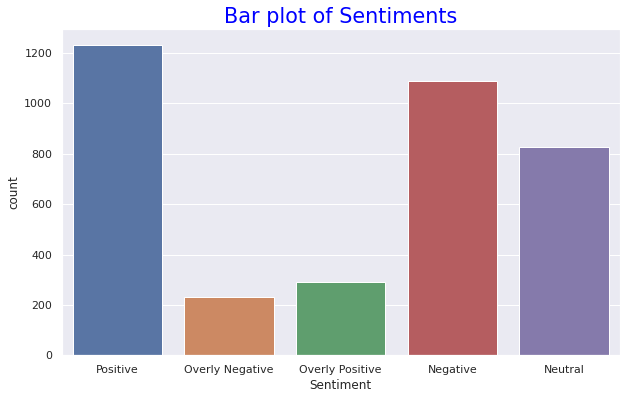

In [153]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment',data=tweets);
plt.title("Bar plot of Sentiments",size='xx-large',color='blue')
plt.savefig('bar plot.png')

**Bar plot does not give a relative count clearly. So, let's plot pie plot**

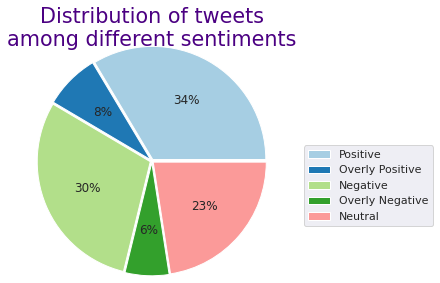

In [171]:
def pie_plot():
    # Number of tweets for different sentiments
    pos = tweets[tweets['Sentiment']=='Positive'].shape[0]
    over_pos = tweets[tweets['Sentiment']=='Overly Positive'].shape[0]
    neg = tweets[tweets['Sentiment']=='Negative'].shape[0]
    over_neg = tweets[tweets['Sentiment']=='Overly Negative'].shape[0]
    neut = tweets[tweets['Sentiment']=='Neutral'].shape[0]
    #print(pos,over_pos,neg,over_neg,neut)
    
    c=sns.color_palette('Paired')[0:5]
    plt.pie(x=[pos,over_pos,neg,over_neg,neut],
            explode=[0.02,0.02,0.02,0.02,0.02],
            colors=c,radius=1.3,center=(6,0), autopct='%.0f%%');
    plt.title("Distribution of tweets\namong different sentiments",
        color="indigo",size="xx-large");
    plt.legend(labels=['Positive','Overly Positive','Negative','Overly Negative','Neutral'],
             loc=(1.2,0.2))
    plt.savefig('sentiment pie chart.png',bbox_inches='tight')

pie_plot()


In [196]:
hell = tweets.copy()

In [204]:
#tweets.columns
#tweets.plot(x='Datetime',y='Sentiment')
#plt.plot(tweets.Datetime,tweets.groupby(by='Sentiment'))
hell['Datetime'] = pd.to_datetime(hell['Datetime']).dt.date
hell1 = hell.groupby(by='Datetime') #.plot(x='Datetime',y='Sentiment')

In [205]:
hell1.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language,Sentiment
0,2023-02-27,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en,Positive
1,2023-02-27,1630221455450427394,action taken tackle european commission chief ...,circleofblue,0,0,en,Overly Negative
2,2023-02-27,1630221451646357504,let collaborate http carbonneutral carbonneutr...,WriteCanvas,0,0,en,Positive
3,2023-02-27,1630221428661407744,affect ecosystem one specie may benefit effect...,TheDailyClimate,0,0,en,Positive
4,2023-02-27,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en,Overly Positive


In [207]:
hell2 = hell.groupby(by=['Datetime','Sentiment'])
hell2.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language,Sentiment
0,2023-02-27,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en,Positive
1,2023-02-27,1630221455450427394,action taken tackle european commission chief ...,circleofblue,0,0,en,Overly Negative
2,2023-02-27,1630221451646357504,let collaborate http carbonneutral carbonneutr...,WriteCanvas,0,0,en,Positive
3,2023-02-27,1630221428661407744,affect ecosystem one specie may benefit effect...,TheDailyClimate,0,0,en,Positive
4,2023-02-27,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en,Overly Positive
5,2023-02-27,1630221401687744519,year hosting action week march event take plac...,UoE_Sus,0,0,en,Positive
6,2023-02-27,1630221400375001088,hiya environmentalist today everyones favorite...,carboncompanies,0,0,en,Negative
7,2023-02-27,1630221395224395783,china approved equivalent two new coal plant ...,EIA_News,0,0,en,Positive
8,2023-02-27,1630221370146578432,must narrative fatalism turning apathy action ...,SDGaction,0,0,en,Negative
11,2023-02-27,1630221348030095360,cult blinded agenda http,BuzzwordBane,0,0,en,Neutral


<AxesSubplot:xlabel='Datetime', ylabel='Sentiment'>

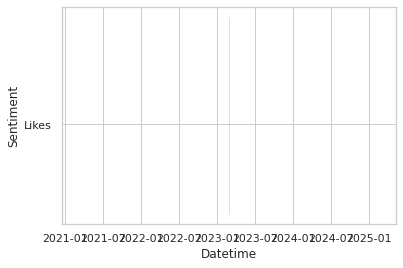

In [210]:
hell3 = tweets.copy()
hell3['Datetime'] = pd.to_datetime(hell3['Datetime']).dt.date
timeline = hell3.melt("Datetime", var_name='Sentiment',  value_name='vals')
sns.lineplot(data=timeline,x='Datetime',y='Sentiment')

<Figure size 1152x288 with 0 Axes>

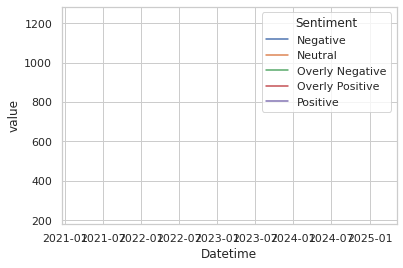

<Figure size 1152x288 with 0 Axes>

In [184]:
# Let's convert 'Datetime' column of tweets DataFrame from a string object to a Datetime object
tweets['Datetime'] = pd.to_datetime(tweets['Datetime'])
timeline = tweets.resample('D', on='Datetime')["Sentiment"].value_counts().unstack(1)
#vals = ['Positive','Overly Positive','Negative','Overly Negative','Neutral']
timeline.reset_index(inplace=True)

timeline = timeline.melt("Datetime", var_name='Sentiment',  value_name='value')

sns.set_style("whitegrid")
sns.lineplot(x="Datetime", y="value", hue="Sentiment", data=timeline)
plt.figure(figsize=(16,4))

# k-Means Clusterring

In [34]:
from sklearn.cluster import KMeans

In [78]:
kmeans = KMeans(n_clusters=3, random_state=4242) #, n_init="auto")
kmeans.fit(X_df)

KMeans(n_clusters=3, random_state=4242)

In [79]:
kmeans.labels_.shape

(3672,)

In [80]:
tweets_kmean = tweets.copy()

In [81]:
tweets_kmean['K Means'] = kmeans.labels_

In [82]:
tweets_kmean.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language,Sentiment,K Means
0,2023-02-27 15:01:00+00:00,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en,Positive,1
1,2023-02-27 15:00:57+00:00,1630221455450427394,action taken tackle european commission chief ...,circleofblue,0,0,en,Overly Negative,2
2,2023-02-27 15:00:56+00:00,1630221451646357504,let collaborate http carbonneutral climatechan...,WriteCanvas,0,0,en,Positive,2
3,2023-02-27 15:00:51+00:00,1630221428661407744,affect ecosystem one specie may benefit effect...,TheDailyClimate,0,0,en,Positive,2
4,2023-02-27 15:00:47+00:00,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en,Overly Positive,2


In [83]:
tweets_kmean['K Means'].value_counts()

1    2008
2    1379
0     285
Name: K Means, dtype: int64

In [84]:
kmeans.cluster_centers_

array([[ 1.62630326e-19, -6.50521303e-19, -2.16840434e-19, ...,
         9.75781955e-19,  3.25260652e-19, -1.62630326e-19],
       [-1.49077799e-18,  1.48841753e-04,  1.30104261e-18, ...,
         1.11778980e-04,  1.37104407e-04, -2.71050543e-18],
       [ 6.04910996e-04,  1.37206446e-03,  3.45543159e-04, ...,
         1.60846922e-03,  2.37622095e-04,  4.81272344e-04]])

In [85]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components=2, random_state=4242)
pcas = pca.fit_transform(X_df)

In [87]:
pcas[:,0]

array([-0.01848179, -0.05270021, -0.08159906, ..., -0.03852022,
       -0.01118261, -0.05467522])

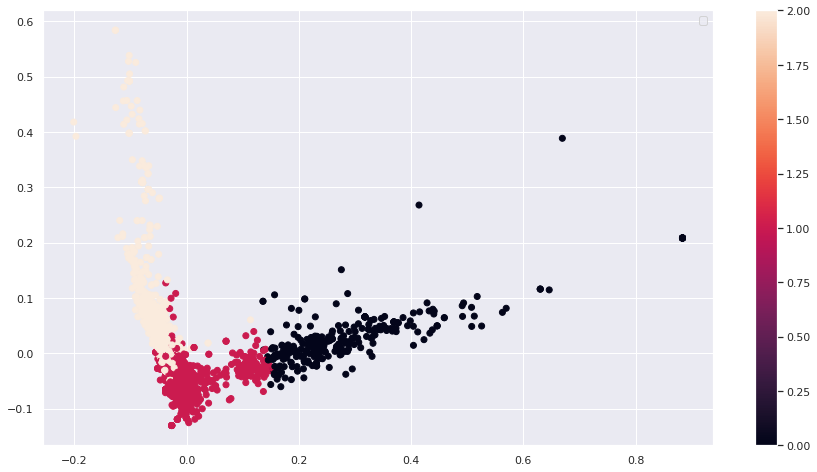

In [88]:
plt.figure(figsize=(15,8))
plt.scatter(x=pcas[:,0], y=pcas[:,1], c=tweets_kmean['K Means'])
plt.legend()
plt.colorbar()

In [60]:
ii = 5
print('k mean:',tweets_kmean['K Means'][ii])
print('Sentiment:',tweets_kmean['Sentiment'][ii])
print(tweets_copy['Content'][ii])

k mean: 4
Sentiment: Positive
This year we will be hosting Climate Action Week
(13-17 March). 

Events will take place across all three campuses that week which showcase sustainability and help you be the change the planet needs. 🌎💚

More details will be coming soon...

#ClimateActionWeek #UniOfEssex https://t.co/Ir6T0JWBo8
